In [2]:
import sqlite3
import time
import datetime
import random
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
style.use('fivethirtyeight')

plt.rcParams['figure.figsize'] = [11, 8]
%matplotlib inline

In [2]:
conn = sqlite3.connect('tutorial.db') # connection
c = conn.cursor() #cursos: do things

In [3]:
def create_table():
    c.execute('CREATE TABLE IF NOT EXISTS StuffToPlot(unix REAL, datestamp TEXT, keyword TEXT, value REAL)')

In [8]:
def data_entry():
    c.execute("INSERT INTO StuffToPlot VALUES(145123543,'2016-01-01','Python',12)")
    conn.commit() #save the database

In [20]:
def dynamic_date_entry():
    unix = time.time()
    date = str(datetime.datetime.fromtimestamp(unix).strftime('%Y-%m-%d %H:%M%S'))
    keyword = 'Python'
    values = random.randrange(0,10)
    c.execute("INSERT INTO StuffToPlot (unix, datestamp, keyword, value)  VALUES (?, ?, ?, ?)",
             (unix, date, keyword, values))
    conn.commit()

In [43]:
def read_from_db():
    c.execute('SELECT * from StuffToPlot')
#     data = c.fetchall() creates a list made out of tuples of every row of the table
#     print(data)
    for row in c.fetchall():
        print(row)

In [55]:
def select_read():
    c.execute('SELECT * from StuffToPlot WHERE value=3 AND keyword="Python"')
    for row in c.fetchall():
        print(row)

In [77]:
def graph_data():
    c.execute('SELECT unix, value FROM StuffToPlot')
    dates = []
    values = []
    for row in c.fetchall():
        dates.append(datetime.datetime.fromtimestamp(row[0]))
        values.append(row[1])
    plt.plot_date(dates, values,'-')
    plt.show()

In [22]:
create_table()
# data_entry()

In [26]:
for i in range(10):
    dynamic_date_entry()
    time.sleep(1)

In [44]:
read_from_db()

(1633584216.3482227, '2021-10-07 00:2336', 'Python', 4.0)
(1633584217.4522152, '2021-10-07 00:2337', 'Python', 7.0)
(1633584218.5486805, '2021-10-07 00:2338', 'Python', 3.0)
(1633584219.6835847, '2021-10-07 00:2339', 'Python', 3.0)
(1633584220.845475, '2021-10-07 00:2340', 'Python', 7.0)
(1633584222.0281522, '2021-10-07 00:2342', 'Python', 7.0)
(1633584223.1792588, '2021-10-07 00:2343', 'Python', 2.0)
(1633584224.2966287, '2021-10-07 00:2344', 'Python', 5.0)
(1633584225.4160879, '2021-10-07 00:2345', 'Python', 3.0)
(1633584226.515823, '2021-10-07 00:2346', 'Python', 8.0)
(1633584273.923321, '2021-10-07 00:2433', 'Python', 8.0)
(1633584275.0617647, '2021-10-07 00:2435', 'Python', 4.0)
(1633584276.1614766, '2021-10-07 00:2436', 'Python', 2.0)
(1633584277.262077, '2021-10-07 00:2437', 'Python', 7.0)
(1633584278.378174, '2021-10-07 00:2438', 'Python', 7.0)
(1633584279.497359, '2021-10-07 00:2439', 'Python', 3.0)
(1633584280.6295853, '2021-10-07 00:2440', 'Python', 4.0)
(1633584281.745425, 

In [56]:
select_read()

(1633584218.5486805, '2021-10-07 00:2338', 'Python', 3.0)
(1633584219.6835847, '2021-10-07 00:2339', 'Python', 3.0)
(1633584225.4160879, '2021-10-07 00:2345', 'Python', 3.0)
(1633584279.497359, '2021-10-07 00:2439', 'Python', 3.0)
(1633584287.6428561, '2021-10-07 00:2447', 'Python', 3.0)
(1633584303.2124262, '2021-10-07 00:2503', 'Python', 3.0)
(1633584306.6117702, '2021-10-07 00:2506', 'Python', 3.0)
(1633584309.927569, '2021-10-07 00:2509', 'Python', 3.0)


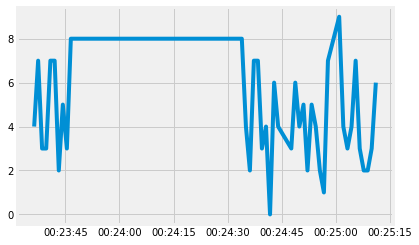

In [82]:
graph_data()

In [84]:
dict(data)

ValueError: dictionary update sequence element #0 has length 4; 2 is required

In [19]:
c.close()
conn.close()

In [3]:
conn = sqlite3.connect('LoaderDB.db') # connection
conn.row_factory = sqlite3.Row
c = conn.cursor()

In [28]:
def select_read():
    c.execute('SELECT * from (LoaderDB, FileNames) WHERE t0 = "2019-02-01"')

In [29]:
select_read()
My_DICTs = [dict(row) for row in c.fetchall()]

In [30]:
My_DICTs

[{'name': 'SIO1',
  'type': 'MOORING',
  'project': 'PISTON',
  't0': '2019-02-01',
  't1': '2019-02-07',
  'lon': 134.7,
  'lat': 12.3,
  'filename': 'SIO1_3160.nc'},
 {'name': 'SIO3',
  'type': 'MOORING',
  'project': 'PISTON',
  't0': '2019-02-01',
  't1': '2019-02-07',
  'lon': 134.7,
  'lat': 12.3,
  'filename': 'SIO1_3160.nc'},
 {'name': 'SIO1',
  'type': 'MOORING',
  'project': 'PISTON',
  't0': '2019-02-01',
  't1': '2019-02-07',
  'lon': 134.7,
  'lat': 12.3,
  'filename': 'SIO1_4021.nc'},
 {'name': 'SIO3',
  'type': 'MOORING',
  'project': 'PISTON',
  't0': '2019-02-01',
  't1': '2019-02-07',
  'lon': 134.7,
  'lat': 12.3,
  'filename': 'SIO1_4021.nc'},
 {'name': 'SIO1',
  'type': 'MOORING',
  'project': 'PISTON',
  't0': '2019-02-01',
  't1': '2019-02-07',
  'lon': 134.7,
  'lat': 12.3,
  'filename': 'SIO1_11181.nc'},
 {'name': 'SIO3',
  'type': 'MOORING',
  'project': 'PISTON',
  't0': '2019-02-01',
  't1': '2019-02-07',
  'lon': 134.7,
  'lat': 12.3,
  'filename': 'SIO1_11